# Neural Networks


Today we will explore *Neural Networks*. Neural Networks are heuristically designed to mimic the way networks of neurons in an organism's brain make decisions, or at least the way we think they do. So we will start with a review of how single neurons and small networks of neurons behave.

<img src='Images/2-whyareneuron.jpg' width='480'/>

A neuron consists of a Soma with Dendrites connected to an Axon with Terminals. The dendrites receive stimulation in the form of neurotransimitters that act to increase the charge held in the Soma. When the charge in the Soma reaches a critical threshhold, a signal in the form of other neurotransmitters is passed by a chemical reaction in a wave down the axon causing the axon terminals to realease neurotransmitters. 

Networks of neurons work together in chains by receiving input in the form of stimulation increasing (or decreasing) their charge, and once they hit a critical threshold communicating stimulation to other neurons in the network. We believe that patterns of firing neurons are responsible for the decsion making processes we can observe in the brains of organisms. There is a lot we do not completely understand about how networks of neurons behave, and it is a complicated chemical and electrical process. There is even less we understand about how the particular patterns of firing neurons in a network represent or are used making decisions. The neural network model we will use here is based on some laboratory evidence of how the data collected by sensory ograns (eyeballs) are communicated to the relevant region of the brain. 

So our Machine Learning algorithm modeled on this is made up of *nodes* set up in layers that collect input that either increases or decreases their excitation level, and if they reach a threshold of excitation they then communicate a signal to the next layer that either increases or decreases excitation levels of some of the nodes in that layer. The network starts with a layer that takes as its inputs values for the features we are using as predictors, and the final layer is a node or nodes that give the output (either a classification or regression). The number and sizes of the layers is a parameter set when the model is defined, and then the coefficients giving the strength of each signal passed from node-to-node are trained to fit the network to the training data using a steepest descent method to find the best choice of parameters.

<img src='Images/nn.png' width='480'/>

Why do neural networks work? Well first they can be trained to work well with training data. They are very flexible and will adapt to nonlinearity in the data. Because the nodes and layers incorportate information from the previous layers in a nonlinear way they are protected from overfitting. 

What is the downside to neural networks? Because of the number of coefficients and their nonlinear relationship there are multiple local minimums and the steepest descent method will not necessarily find the best one. There is some randomness in the training of the model that can result in different minimums being found. The other downside, similar to the *boosting* and *random forest* ensemble models we saw already is that neural networks are hard to interpret.

For example. I have found that a neural network with two layers of 100 nodes would do a good job of predicting which students in *Mathematics for Liberal Arts* need additional support. However we cannot use a neural network as placement mechanism (well not easily anyway, how would we explain to a student what they can do to improve their placement?).

We will do a couple of examples of using a Neural Network with two predictors because it will let us draw some nice graphs of the result; however the real power of the method is when there are a large number of predictors.

## Horsepower Data

In [1]:
import pandas as pa
import matplotlib.pyplot as plt
import matplotlib.colors as pltco
import numpy as np

In [2]:
mpg = pa.read_csv('Data Sets/auto-mpg.csv', names=['mpg', 'cylinders', 'displacement', 'horsepower', 
                                                   'weight', 'acceleration', 'model year', 'origin', 'car name'])
mpg.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,1,"\t""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,1,"\t""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,1,"\t""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,1,"\t""ford torino"""
5,15.0,8,429.0,198,4341,10.0,70,1,"\t""ford galaxie 500"""
6,14.0,8,454.0,220,4354,9.0,70,1,"\t""chevrolet impala"""
7,14.0,8,440.0,215,4312,8.5,70,1,"\t""plymouth fury iii"""
8,14.0,8,455.0,225,4425,10.0,70,1,"\t""pontiac catalina"""
9,15.0,8,390.0,190,3850,8.5,70,1,"\t""amc ambassador dpl"""


In [3]:
mpg = mpg[mpg.horsepower!='?']
mpg.horsepower = mpg.horsepower.astype('int')

In [4]:
X = np.array(mpg[['horsepower', 'weight']])
y = np.array(mpg['mpg'])

In [5]:
import numpy.random as rn

One note here:  I've realized that we probably should be using a different permutation for each run even across multiple models so for this class I have moved the training/testing set division inside of the plot command. This also means that the fit for the model is in there as well. The function now returns the fitted model. 

In [6]:
# A bit of code for plotting the contour in a regression problem with two predictors
# Also prints out the training and testing errors

def plot_reg_model(reg, X, y):

    # We shuffle the data using a random permutation

    n = X.shape[0]
    test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]       # Then create the test
    y_test = y[:test]
    X_train = X[test:]     # and train sets
    y_train = y[test:]
    
    reg.fit(X_train, y_train) # Fit the model
     
    nn = 200
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),   # Changed the function to use linspace rather than arrange
        np.linspace(y_min, y_max, nn))                    # This keeps us from having to adjust h.
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()]) # predict

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))
    
    return reg

Check how the existing regression algorithms from our toolbox do on this data:

In [7]:
from sklearn.linear_model import LinearRegression

Training R2: 0.7104783416258659
Testing R2: 0.680858177576124


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

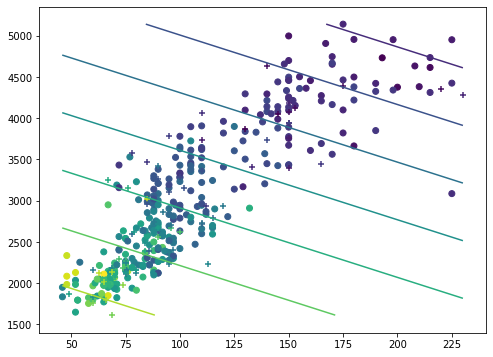

In [8]:
reg = LinearRegression()
plot_reg_model(reg, X, y)

In [10]:
from sklearn.linear_model import Ridge

Training R2: 0.7028774275556062
Testing R2: 0.7197176939165757


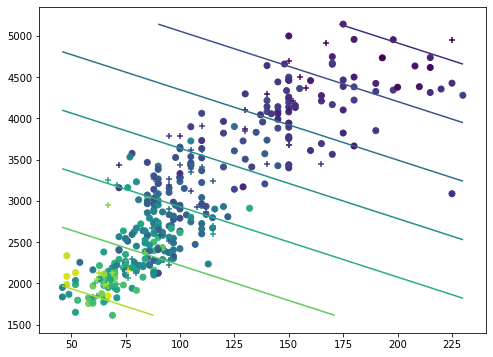

In [11]:
reg = Ridge(alpha=2)
plot_reg_model(reg, X, y);

In [12]:
from sklearn.linear_model import Lasso

Training R2: 0.7088271369778774
Testing R2: 0.6924280528966797


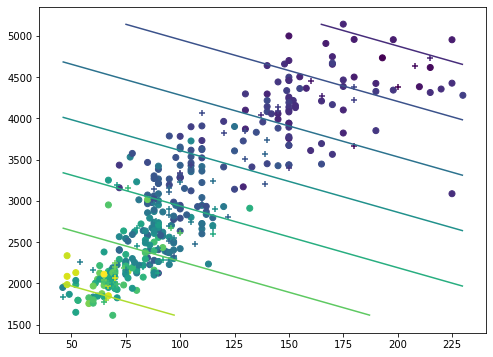

In [13]:
reg=Lasso(alpha=1)
plot_reg_model(reg, X, y);

In [14]:
from sklearn.neighbors import KNeighborsRegressor

Training R2: 0.8067276048350414
Testing R2: 0.6448926708709681


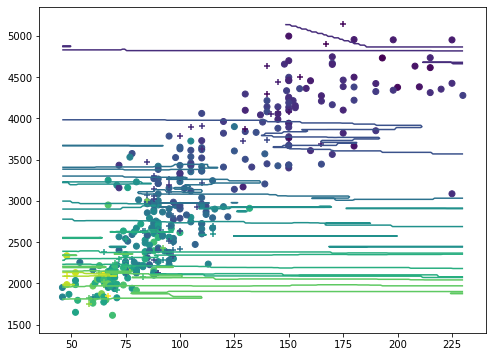

In [15]:
knn = KNeighborsRegressor(n_neighbors=6)
plot_reg_model(knn, X, y);

In [16]:
from sklearn.tree import DecisionTreeRegressor

Training R2: 0.7703430790391328
Testing R2: 0.7205122509560596


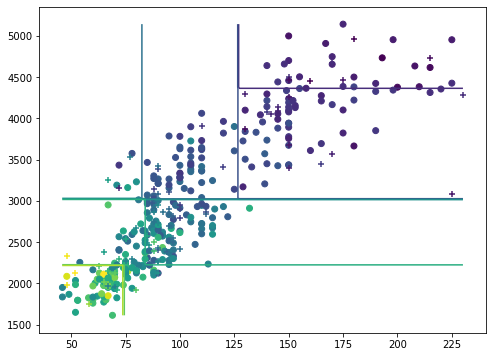

In [17]:
tree = DecisionTreeRegressor(max_depth=3)
plot_reg_model(tree, X, y);

### Ensemble Methods

The ensemble methods we learned last week (Random Forest and Boosting).

In [18]:
from sklearn.ensemble import RandomForestRegressor

Training R2: 0.7835730867102109
Testing R2: 0.7801114736887802


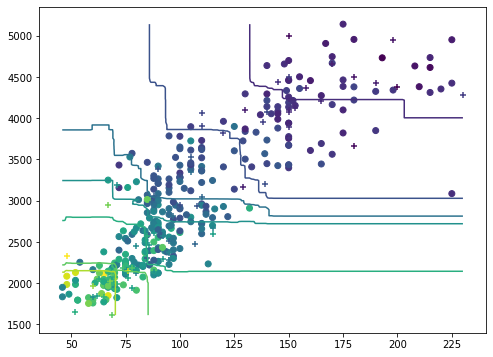

In [19]:
forest = RandomForestRegressor(n_estimators=100, max_depth=3, n_jobs=-1)
plot_reg_model(forest, X, y);

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

Training R2: 0.8127889367163682
Testing R2: 0.8258840050482259


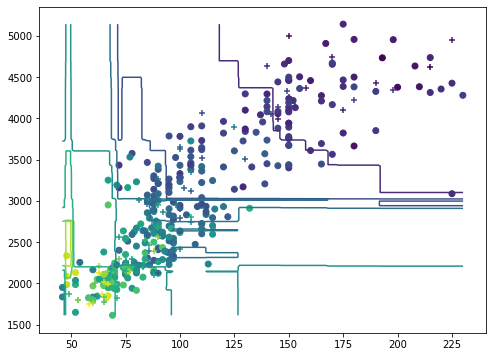

In [23]:
boost = GradientBoostingRegressor(n_estimators=25, learning_rate=0.1, max_depth=3)
plot_reg_model(boost, X, y);

## Neural Networks for Regression

Let's apply the *Multi-Layer Perceptron Regressor* from scikitlearn to this data. The model has parameters:

- *hidden_layer_sizes* gives the number of neurons in each layer other than input and output;
- *activation* for choosing the function to model the activation profiles for the hidden layers;
- *solver* giving the method for solving for the minimum, note the recomendation in the documentation to use 'adam' for large data sets and 'lbfgs' for smaller.
- *alpha* a $L^2$ penalty parameter (forcing regularization);

The trick is to develop a method for systemactically exploring the parameter space to develop the best model. Note that the hidden layer parameter is a list (tuple) of numbers giving the number of layers and the size of those layers.

Neural Networks are models that respond better after normalization so this is a recomended step for these cases.

In [24]:
v = [0]*X.shape[1]
for k in range(X.shape[1]):
    M = X[:, k].max()
    m = X[:, k].min()
    v[k] = (X[:, k] - m)/(M - m)
Xn = np.c_[v].transpose()   # Note I could not assign these to X because the type was int not float

In [25]:
from sklearn.neural_network import MLPRegressor

Training R2: 0.7551947016655284
Testing R2: 0.7556390581909114


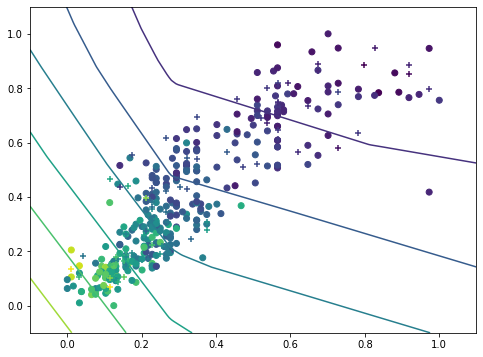

In [26]:
mlp = MLPRegressor(hidden_layer_sizes = (100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
plot_reg_model(mlp, Xn, y);

Adding an additional hidden layer for this problem improves performance.

Training R2: 0.7564503750814087
Testing R2: 0.7725601441371106


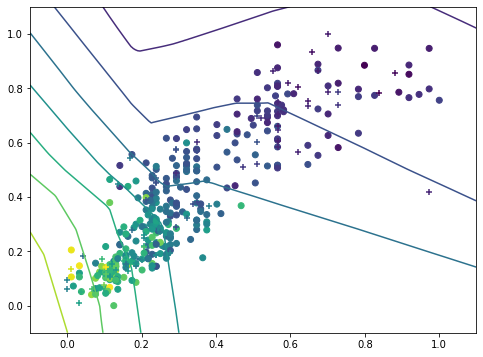

In [31]:
mlp = MLPRegressor(hidden_layer_sizes = (100, 100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
plot_reg_model(mlp, Xn, y);

So very quickly we get good performance. The resulting regression has some of the features of K-Nearest Neighbors, Decsision Trees, and Ensembles for this data but is smoother.

## Classification

For classification, we consider the Baseball Pitcher Classification.

In [163]:
# Read in the major league players data set

major = pa.read_csv('Data Sets/Major League Height-Weight.csv')   # creates a pandas Dataframe from a .csv file
major = major.rename({'Height(inches)':'Height', 'Weight(pounds)':'Weight'}, axis=1)  
major = major.drop(640, axis=0) 

# Each row of a data frame is a data point - in this case a player.
# Each column is a feature about the data point (its coordinates if you will)

major.head()   # displays the first few rows

,Name,Team,Position,Height,Weight,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [164]:
# We are going to make a dictionary of key:value pairs to recode the Position feature to 
# 'Pitcher' and 'Not Pitcher'

pos_dict = {x:1 for x in list(set(major.Position)) if 'Pitcher' in x}
pos_dict2 = {x:0 for x in list(set(major.Position)) if not 'Pitcher' in x}

# Using dictionary comprehensions

pos_dict.update(pos_dict2) # merge the two dictionaries

major_2 = major.copy()   # pandas.dataframe is a mutable object so we use the .copy() command 
                         # otherwise changes to major_2 will change major
    
major_2.Position = major_2.Position.map(pos_dict)  # use the dictionary we made to recode the values with .map()

major_2

,Name,Team,Position,Height,Weight,Age
0,Adam_Donachie,BAL,0,74,180.0,22.99
1,Paul_Bako,BAL,0,74,215.0,34.69
2,Ramon_Hernandez,BAL,0,72,210.0,30.78
3,Kevin_Millar,BAL,0,72,210.0,35.43
4,Chris_Gomez,BAL,0,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,1,73,190.0,25.08
1030,Tyler_Johnson,STL,1,74,180.0,25.73
1031,Chris_Narveson,STL,1,75,205.0,25.19
1032,Randy_Keisler,STL,1,75,190.0,31.01


In [165]:
X = np.array(major_2[['Height', 'Weight']])
y = np.array(major_2['Position'])

In [166]:
v = [0]*X.shape[1]
for k in range(X.shape[1]):
    M = X[:, k].max()
    m = X[:, k].min()
    v[k] = (X[:, k] - m)/(M - m)
Xn = np.c_[v].transpose()   # Note I could not assign these to X because the type was int not float

In [167]:
# A bit of code for plotting the decision boundaries in a categorical problem with two predictors and two values for the result
# Also prints out the training and testing errors

def plot_cat_model(clf, X, y):

    n = X.shape[0]
    test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]       # Then create the test
    y_test = y[:test]
    X_train = X[test:]     # and train sets
    y_train = y[test:]
    
    clf.fit(X_train, y_train) # Fit the model
    
    nn = 200 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),
        np.linspace(y_min, y_max, nn))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = pltco.ListedColormap(['#FF0000', '#00FF00'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light);

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, marker='+');
    
    print('Training Error: {}'.format(clf.score(X_train, y_train)))
    print('Testing Error: {}'.format(clf.score(X_test, y_test)))

Check how the classification does on with the tools we have seen previously.

In [168]:
from sklearn.linear_model import LogisticRegression

Training Error: 0.656590084643289
Testing Error: 0.6359223300970874


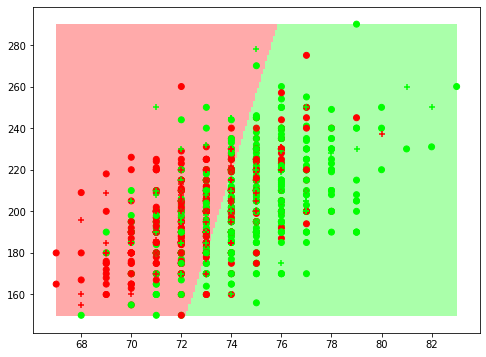

In [178]:
clf = LogisticRegression(solver = 'lbfgs')
plot_cat_model(clf, X, y)

In [170]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Training Error: 0.6469165659008465
Testing Error: 0.6650485436893204


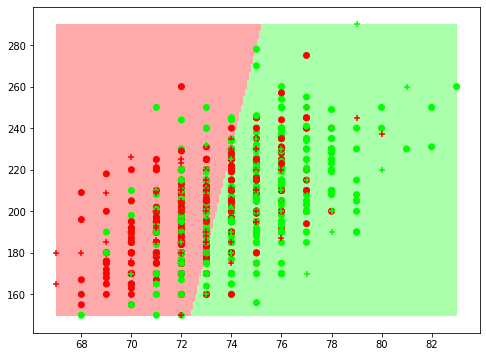

In [179]:
clf = LinearDiscriminantAnalysis()
plot_cat_model(clf, X, y)

In [180]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Training Error: 0.6614268440145102
Testing Error: 0.6553398058252428


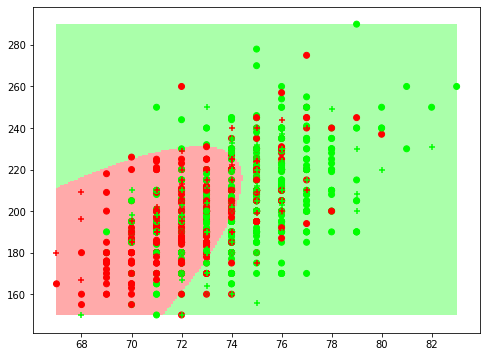

In [181]:
clf = QuadraticDiscriminantAnalysis()
plot_cat_model(clf, X, y)

In [182]:
from sklearn.svm import SVC

Training Error: 0.6517533252720678
Testing Error: 0.6359223300970874


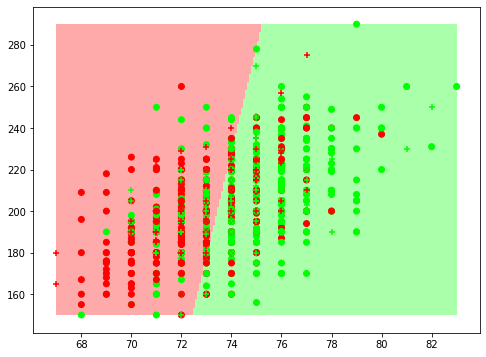

In [183]:
clf = SVC(C=1.0, gamma='auto', kernel='linear')
plot_cat_model(clf, X, y)

Training Error: 0.727932285368803
Testing Error: 0.6262135922330098


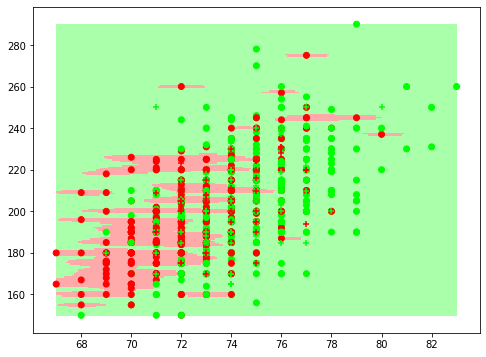

In [184]:
clf = SVC(C=0.5, gamma='auto', kernel='rbf')
plot_cat_model(clf, X, y)

In [185]:
from sklearn.neighbors import KNeighborsClassifier

Training Error: 0.7085852478839177
Testing Error: 0.616504854368932


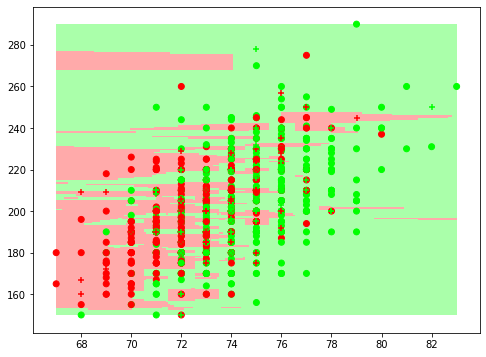

In [186]:
clf = KNeighborsClassifier(n_neighbors=3)
plot_cat_model(clf, X, y)

In [187]:
from sklearn.tree import DecisionTreeClassifier

Training Error: 0.6795646916565901
Testing Error: 0.6893203883495146


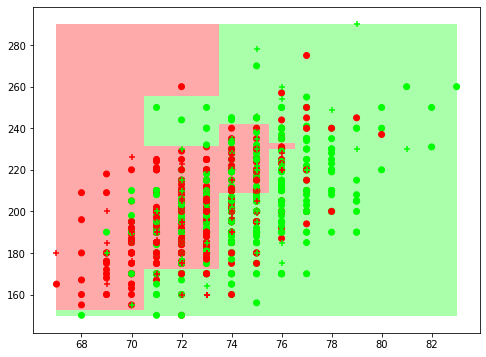

In [188]:
tree = DecisionTreeClassifier(max_depth=5)
plot_cat_model(tree, X, y)

In [189]:
from sklearn.ensemble import RandomForestClassifier

Training Error: 0.6747279322853688
Testing Error: 0.6067961165048543


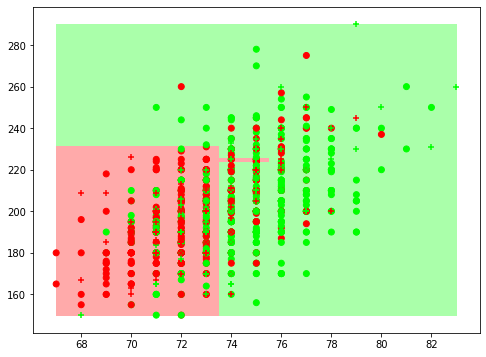

In [190]:
forest = RandomForestClassifier(n_estimators=100, max_depth=3)
plot_cat_model(forest, X, y)


## Neural Networks for Classification

For Classification the output layer has a cell for each class and a point is classified if the resulting class becomes activated (again the activation function for the cells is one of the parameters that can be set).

In [40]:
from sklearn.neural_network import MLPClassifier

Training Error: 0.6541717049576784
Testing Error: 0.6601941747572816


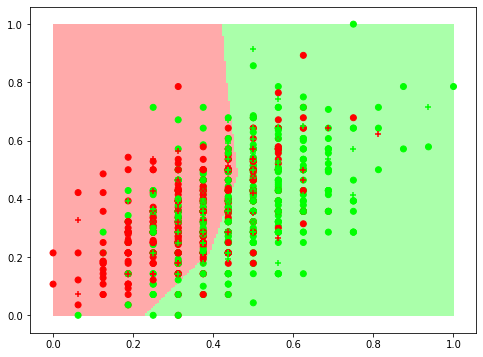

In [192]:
clf = MLPClassifier(hidden_layer_sizes = (10, 10, 10))
plot_cat_model(clf, Xn, y)

In this example the neural network does not respond particularly well, although interestingly it gives a much different classification model than the more rigid models above. 

Neural networks are especially capable when using a large number of features. Also for the sake of an example doing this we will do a multi-class problem which presents some difficulties.

In [32]:
names=['Sex', 'Length', 'Diameter', 'Height', 'Whole_Weight', 'Shucked_Weight',
                                                        'Viscera_Weight', 'Shell_Weight', 'Rings']

In [33]:
ab = pa.read_csv('Data Sets/Abalone/abalone.csv', names=names)
ab.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [34]:
# One hot encoding for the 'Sex' feature

for k in ab.index:
    if ab.loc[k, 'Sex']=='M':
        ab.loc[k, 'Male']=1
    else: ab.loc[k, 'Male']=0
    if ab.loc[k, 'Sex']=='F':
        ab.loc[k, 'Female']=1
    else: ab.loc[k, 'Female']=0
    if ab.loc[k, 'Sex']=='I':
        ab.loc[k, 'Infant']=1
    else: ab.loc[k, 'Infant']=0
        
ab.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings,Male,Female,Infant
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1.0,0.0,0.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1.0,0.0,0.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0.0,1.0,0.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1.0,0.0,0.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.0,0.0,1.0


In [35]:
t = ab.Rings.mean()
for k in ab.index:
    if ab.loc[k, 'Rings'] < t:
        ab.loc[k, 'Age'] = 0
    else: ab.loc[k, 'Age'] = 1

In [36]:
keep = ['Length', 'Diameter', 'Height', 'Whole_Weight', 'Shucked_Weight', 
         'Viscera_Weight', 'Shell_Weight', 'Male', 'Female', 'Infant']
X = np.array( ab[ keep] )
y = np.array( ab['Rings'])


In [37]:
v = [0]*X.shape[1]
for k in range(X.shape[1]):
    M = X[:, k].max()
    m = X[:, k].min()
    v[k] = (X[:, k] - m)/(M - m)
Xn = np.c_[v].transpose()   # Note I could not assign these to X because the type was int not float

In [38]:
def fit_test_model(clf, X, y):
    n = X.shape[0]
    test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]       # Then create the test
    y_test = y[:test]
    X_train = X[test:]     # and train sets
    y_train = y[test:]
    
    clf.fit(X_train, y_train) # Fit the model
    
    print('Training Error: {}'.format(clf.score(X_train, y_train)))
    print('Testing Error: {}'.format(clf.score(X_test, y_test)))

In [200]:
clf = LogisticRegression(solver = 'lbfgs', multi_class='auto', max_iter=500)
fit_test_model(clf, X, y)

Training Error: 0.2639138240574506
Testing Error: 0.2407185628742515


In [201]:
clf = LinearDiscriminantAnalysis()
fit_test_model(clf, X, y)

Training Error: 0.2803710353081987
Testing Error: 0.2275449101796407


/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Note that this problem kicks a warning because some of our variables are related. To fix this we should determine which variables are related and remove one, or we should use a pre-processing routine like PCA.

Because we are doing a multiclass problem and one of our classes only has one sample the Quadratic Discriminant Analysis does not apply. That is for one class there is no such thing as variance. This might also be causing the collinear warning above.

In [202]:
clf = SVC(C=1.0, gamma='auto', kernel='linear')
fit_test_model(clf, X, y)

Training Error: 0.2564332734889288
Testing Error: 0.2502994011976048


In [203]:
clf = SVC(C=1.0, gamma='auto', kernel='rbf')
fit_test_model(clf, X, y)

Training Error: 0.24356672651107122
Testing Error: 0.2347305389221557


In [204]:
clf = KNeighborsClassifier(n_neighbors=13)
fit_test_model(clf, X, y)

Training Error: 0.3761220825852783
Testing Error: 0.27065868263473053


In [205]:
clf = DecisionTreeClassifier(max_depth=5)
fit_test_model(clf, X, y)

Training Error: 0.31538001196888094
Testing Error: 0.24910179640718563


In [206]:
clf = RandomForestClassifier(n_estimators=250, max_depth=5)
fit_test_model(clf, X, y)

Training Error: 0.3216636744464393
Testing Error: 0.26467065868263473


Ensemble models are starting to make a big improvement over our more basic models. Let's check the feature importances.

In [207]:
def plot_feature_importances(model, names, tol=10**-3):
    n_features = len(names)
    plot_names = []
    plot_importances = []
    
    for k in range(n_features):
        if model.feature_importances_[k] > tol:
            plot_names += [ names[k] ]
            plot_importances += [ model.feature_importances_[k] ]
    
    n_plot = len(plot_names)
    
    plt.figure(figsize = (10, 6))
    plt.barh(range(n_plot), plot_importances, align = 'center')
    plt.yticks(np.arange(n_plot), plot_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.ylim(-1, n_plot)

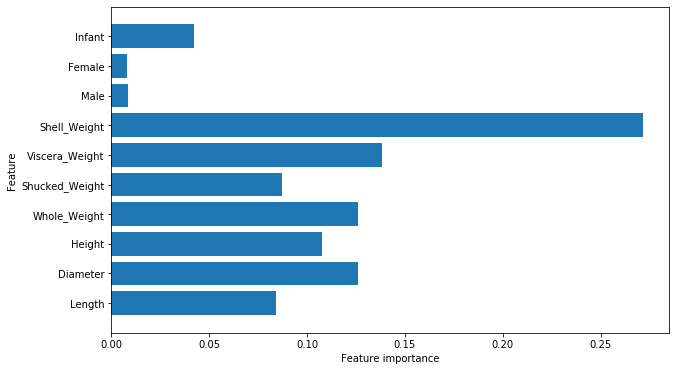

In [208]:
plot_feature_importances(clf, keep)

Now working with a Neural Network:

In [41]:
nnclf = MLPClassifier(hidden_layer_sizes = (100), max_iter=300)
fit_test_model(nnclf, Xn, y)

Training Error: 0.2929383602633154
Testing Error: 0.2694610778443114


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


So with one layer, even after adjusting the *max_iter* parameter to be larger, we still get a convergence warning. Rather than continue to play with the number of interations (which makes the model take a while to train) let's adjust the number of neurons and layers.

In [47]:
nnclf = MLPClassifier(hidden_layer_sizes = (100, 10))
fit_test_model(nnclf, Xn, y)

Training Error: 0.29204069419509276
Testing Error: 0.25149700598802394


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Still getting the error. No worries, let's add another layer.

In [48]:
nnclf = MLPClassifier(hidden_layer_sizes = (100, 100, 10))
fit_test_model(nnclf, Xn, y)

Training Error: 0.28845002992220226
Testing Error: 0.28622754491017965


Warning is gone, and we see that the model is performing well.

In [44]:
nnclf = MLPClassifier(hidden_layer_sizes = (100, 100, 100, 10))
fit_test_model(nnclf, Xn, y)

Training Error: 0.2905445840813884
Testing Error: 0.2838323353293413


In [45]:
nnclf = MLPClassifier(hidden_layer_sizes = (100, 100, 100, 100, 10))
fit_test_model(nnclf, Xn, y)

Training Error: 0.2950329144225015
Testing Error: 0.281437125748503


In [46]:
nnclf = MLPClassifier(hidden_layer_sizes = (100, 100, 100, 100, 100, 10))
fit_test_model(nnclf, Xn, y)

Training Error: 0.3016157989228007
Testing Error: 0.2694610778443114


Now to be systematic about it. We will fix the number of hidden the layers and vary the number of neurons in the last layer and try to identify the best choice. Setting up a cross validation.

In [120]:
# We shuffle the data using a random permutation

n = Xn.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
Xn = Xn[perm]
y = y[perm]

tests = 12
a = np.linspace(5, tests*2+5, tests).astype('int')  # the number of neurons in a layer must be an int

names1 = [ 'train_{}'.format(x) for x in range(tests)]
names2 = [ 'test_{}'.format(x) for x in range(tests)]
names = []
for c in range(tests):
    names += [names1[c], names2[c]]


Error = pa.DataFrame( np.array([ [0]*5 ]*2*tests).transpose(), columns = names)
# Making a DataFrame to record the R2 values in

for k in range(5):
    X_test = Xn[k*test:(k+1)*test]       # Then create the test
    y_test = y[k*test:(k+1)*test]
    X_train = np.concatenate( (Xn[:k*test], Xn[(k+1)*test:]), axis=0)     # and train sets
    y_train = np.concatenate( (y[:k*test], y[(k+1)*test:]), axis=0)
    
    for c in range(tests):
        clf = MLPClassifier(hidden_layer_sizes = (100, 100, 100, 100, a[k])).fit(X_train, y_train)
        Error.iloc[k, 2*c] = clf.score(X_train, y_train)
        Error.iloc[k, 2*c+1] = clf.score(X_test, y_test)

Error_mean = [0]*2*tests
Error_std = [0]*2*tests
for c in range(2*tests):
    Error_mean[c] = np.mean(Error.iloc[0:5, c])
    Error_std[c] = np.std(Error.iloc[0:5, c])
    
Error = Error.append( pa.Series(Error_mean, index=Error.columns), ignore_index=True )
Error = Error.append( pa.Series(Error_std, index=Error.columns), ignore_index=True)
Error.index = [0, 1, 2, 3, 4, 'Mean', 'Standard Deviation']
Error

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,train_0,test_0,train_1,test_1,train_2,test_2,train_3,test_3,train_4,test_4,...,train_7,test_7,train_8,test_8,train_9,test_9,train_10,test_10,train_11,test_11
0,0.290245,0.286228,0.274686,0.264671,0.288151,0.293413,0.289647,0.288623,0.288749,0.300599,...,0.165171,0.164072,0.292639,0.298204,0.288151,0.271856,0.287852,0.297006,0.290545,0.282635
1,0.293537,0.276647,0.286056,0.271856,0.287253,0.297006,0.286954,0.289820,0.289946,0.268263,...,0.299521,0.295808,0.294734,0.274251,0.288749,0.279042,0.289647,0.288623,0.294434,0.289820
2,0.289348,0.298204,0.293238,0.304192,0.282466,0.302994,0.296529,0.305389,0.297427,0.306587,...,0.272591,0.301796,0.292340,0.307784,0.286655,0.291018,0.288450,0.270659,0.286954,0.281437
3,0.298025,0.246707,0.302513,0.251497,0.297427,0.270659,0.298923,0.245509,0.297127,0.265868,...,0.289048,0.255090,0.307301,0.271856,0.294434,0.263473,0.301017,0.264671,0.295033,0.269461
4,0.307600,0.262275,0.307002,0.256287,0.305805,0.251497,0.307301,0.255090,0.301616,0.249102,...,0.304010,0.258683,0.304608,0.251497,0.304309,0.252695,0.304010,0.249102,0.308797,0.250299
Mean,0.295751,0.274012,0.292699,0.269701,0.292220,0.283114,0.295871,0.276886,0.294973,0.278084,...,0.266068,0.255090,0.298324,0.280719,0.292460,0.271617,0.294195,0.274012,0.295153,0.274731
Standard Deviation,0.006660,0.018026,0.011574,0.018606,0.008343,0.019230,0.007192,0.022703,0.004874,0.021932,...,0.051594,0.049268,0.006342,0.020063,0.006486,0.013084,0.006882,0.017095,0.007418,0.013855


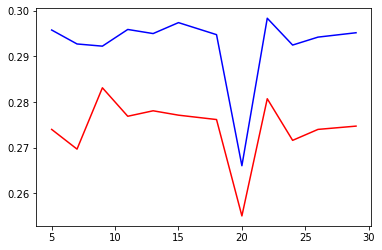

In [121]:
plt.plot(a, Error_mean[::2], 'b-')
plt.plot(a, Error_mean[1::2], 'r-');

There is a lot we do not understand about neural networks for machine learning. For example why does the network, for this dataset, experience a dip in accuracy when the last hidden layer has 20 neurons?

Neural networks, paritcularly those with a large number of layers are very difficult to interepret. What we can do is ask what are the coefficients that were computed by the model connecting each layer. This is easy to understand for the connection between the features and the first hidden layer but becomes increasingly hard to interpret with each successive layer. This model with five layers will be especially difficult to interpret.

Based on the graph above I worked with a network with five hidden layers, the first four with 100 neurons and the last one with 9 neurons.

In [49]:
clf = MLPClassifier(hidden_layer_sizes = (100, 100, 100, 100, 9)).fit(Xn, y)

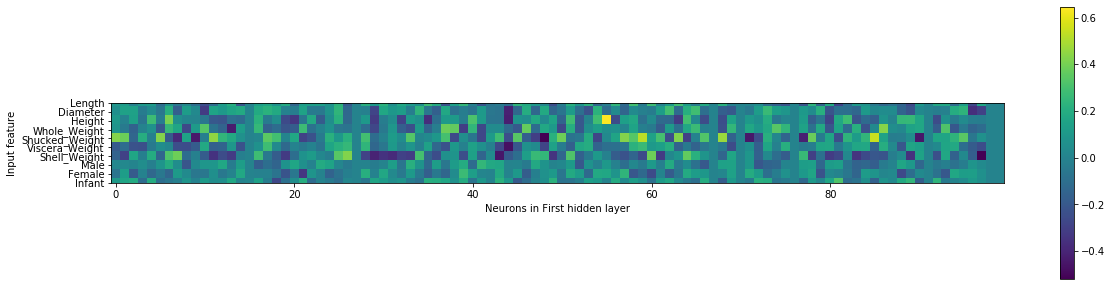

In [50]:
plt.figure(figsize = (20, 5))
plt.imshow(clf.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(len(keep)), keep)
plt.xlabel('Neurons in First hidden layer')
plt.ylabel('Input feature')
plt.colorbar();

Bright colors indicate that that feature contributes to the corresponding neuron in the first hidden layer a positive coefficient (increasing excitation), while a dark color indicates that that feature contributes to the corresponding neuron in the first hidden layer a negative coefficient (decreasing excitation). 

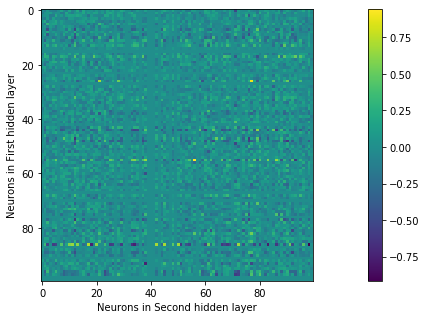

In [58]:
plt.figure(figsize = (20, 5))
plt.imshow(clf.coefs_[1], interpolation='none', cmap='viridis')
plt.xlabel('Neurons in Second hidden layer')
plt.ylabel('Neurons in First hidden layer')
plt.colorbar();

You can start to see the difficulty with trying to understand how a change in one of the feature values will translate in to a change in the prediction.

If you are interested in going deeper into Neural Networks, including trying to increase their interpretative value, please look for CS 456 class in Spring 2021.